In [294]:
import numpy as np
import subprocess
import os

# FUNCTIONS

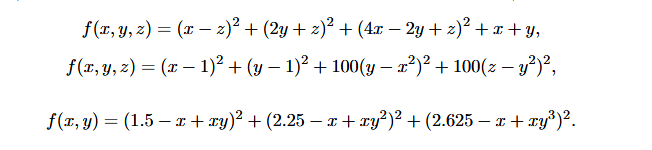

In [302]:
def f1(x, y, z):
    return (x - z) ** 2 + (2*y + z) ** 2 + (4*x -2*y + z) ** 2 + x + y

#min: -19/96 at [-1/6, -11/48, 1/6]

def f2(x, y, z):
    return ((x - 1) ** 2) + ((y - 1) ** 2) + 100*((y - (x ** 2)) ** 2) + 100*((z - (y ** 2)) ** 2)

#min: 0 at [1, 1, 1]

def f3(x, y):
    return (1.5 - x + x*y) ** 2 + (2.25 - x + x*(y ** 2)) ** 2 + (2.625 - x + x*(y ** 3)) ** 2

#min: 0 at [3, 0.5]


def func(x, y):
    return x**2 + np.e**x + y**2 -x*y

def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

def quad3d(x, y, z):
    return (x - 1)**2 + (y - 2)**2 + (z + 1)**2

env = os.environ.copy()
env["PATH"] += r";C:\msys64\usr\bin"

def blackbox1(x, y, z):
    result = subprocess.run(
        ["./hw4_1_executables/hw4_1_win.exe", "63240458", "1", f"{x}", f"{y}", f"{z}"],  # command and args
        capture_output=True,    # capture stdout and stderr
        text=True,              # get output as string (not bytes)
        env=env
    )

    return(float(result.stdout))

# 2D NELDER MEAD

I will first implement only the 2 dimensional version in order to try to figure out the core logics.

In [325]:
def nelder_mead_2d(v1, v2, v3, f):

    points = np.array([v1, v2, v3])
    zs = np.array([f(*point) for point in points])

    #the loop should start here
    for i in range(100):
        sorted_indices = np.argsort(zs)

        zs[:] = zs[sorted_indices]
        points[:] = points[sorted_indices]
        best = points[0]
        good = points[1]
        worst = points[2]

        #Sanity check
        # print(best, f(*best))
        # print(good, f(*good))
        # print(worst, f(*worst))

        M = (best + good) / 2
        R = 2*M - worst
        E = 2*R - M
        # print(M, R, E)

        yr = f(*R)
        ye = f(*E)

        if yr < zs[0]:
            if ye < yr:
                next_point = E
            else:
                next_point = R
            new_val = f(*next_point)
            points[2] = next_point
            zs[2] = new_val
        
        elif yr < zs[1]:
            points[2] = R
            zs[2] = f(*R)
        
        elif yr < zs[2]:
            oc = worst + 3/2 * (M - worst)
            yoc = f(*oc)
            if yoc < yr:
                points[2] = oc
                zs[2] = f(*oc)
            else: #shrink
                for i in range(1, len(points)):
                    points[i] = 0.5 * (points[0] + points[i])
                    zs[i] = f(*points[i])

        else:
            k = worst + 1/2 * (M - worst)
            yk = f(*k)
            if yk < zs[2]:
                points[2] = k
                zs[2] = f(*k)
            else: #shrink
                for i in range(1, len(points)):
                    points[i] = 0.5 * (points[0] + points[i])
                    zs[i] = f(*points[i])

    print(f(*best), best)

7.514482516117321e-15 [1.00000007 1.00000014]

In [326]:
test_point1 = np.array([4.5, 4.5])
test_point2 = test_point1 + np.array([5, 0])
test_point3 = test_point1 + np.array([0, 5])

nelder_mead_2d(test_point1, test_point2, test_point3, rosenbrock)


7.514482516117321e-15 [1.00000007 1.00000014]


In [248]:
# test_point1 = np.array([1, 1])
# test_point2 = test_point1 + np.array([2, 0])
# test_point3 = test_point1 + np.array([0, 2])


nelder_mead_2d(test_point1, test_point2, test_point3, f3)


0.0 [3.  0.5]


In [ ]:
def nelder_mead_3d(v1, v2, v3, v4, f):

    points = np.array([v1, v2, v3, v4])
    zs = np.array([f(*point) for point in points])

    #the loop should start here
    for i in range(100):
        sorted_indices = np.argsort(zs)

        zs[:] = zs[sorted_indices]
        points[:] = points[sorted_indices]
        best = points[0]
        good = points[2]
        worst = points[3]

        #Sanity check
        # print(best, f(*best))
        # print(good, f(*good))
        # print(worst, f(*worst))

        M = (best + good) / 2
        R = 2*M - worst
        E = 2*R - M
        # print(M, R, E)

        yr = f(*R)
        ye = f(*E)

        if yr < zs[0]:
            if ye < yr:
                next_point = E
            else:
                next_point = R
            points[3] = next_point
            zs[3] = f(*next_point)
        
        elif yr < zs[2]:
            points[2] = R
            zs[2] = f(*R)
        
        elif yr < zs[3]:
            oc = worst + 3/2 * (M - worst)
            yoc = f(*oc)
            if yoc < yr:
                points[3] = oc
                zs[3] = f(*oc)
            else: #shrink
                for i in range(1, len(points)):
                    points[i] = 0.5 * (points[0] + points[i])
                    zs[i] = f(*points[i])

        else:
            k = worst + 1/2 * (M - worst)
            yk = f(*k)
            if yk < zs[3]:
                points[3] = k
                zs[3] = f(*k)
            else: #shrink
                for i in range(1, len(points)):
                    points[i] = 0.5 * (points[0] + points[i])
                    zs[i] = f(*points[i])

        print(f(*best), best)

In [278]:
v1 = np.array([0.0, 0.0, 0.0])
v2 = np.array([1.0, 0.0, 0.0])
v3 = np.array([0.0, 1.0, 0.0])
v4 = np.array([0.0, 0.0, 1.0])

nelder_mead_3d(v1, v2, v3, v4, f2)

2.0 [0. 0. 0.]
2.0 [0. 0. 0.]
2.0 [0. 0. 0.]
2.0 [0. 0. 0.]
2.0 [0. 0. 0.]
2.0 [0. 0. 0.]
2.0 [0. 0. 0.]
2.0 [0. 0. 0.]
2.0 [0. 0. 0.]
2.0 [0. 0. 0.]
2.0 [0. 0. 0.]
1.9928323980441291 [0.10058594 0.06591797 0.00463867]
1.7838963712359055 [ 0.11987305  0.02722168 -0.02081299]
1.7838963712359055 [ 0.11987305  0.02722168 -0.02081299]
1.4718885966684696 [ 0.33068848  0.13970947 -0.02426147]
1.4592923453087339 [ 0.32843018  0.07278442 -0.01066589]
1.4592923453087339 [ 0.32843018  0.07278442 -0.01066589]
1.4592923453087339 [ 0.32843018  0.07278442 -0.01066589]
1.4592923453087339 [ 0.32843018  0.07278442 -0.01066589]
1.4592923453087339 [ 0.32843018  0.07278442 -0.01066589]
1.2191217268494206 [0.36510468 0.15986252 0.00564384]
1.2191217268494206 [0.36510468 0.15986252 0.00564384]
1.2191217268494206 [0.36510468 0.15986252 0.00564384]
1.2191217268494206 [0.36510468 0.15986252 0.00564384]
1.2191217268494206 [0.36510468 0.15986252 0.00564384]
1.2191217268494206 [0.36510468 0.15986252 0.00564384]
1

# BLACKBOX FUNCTIONS

When running the method it occured to me that calculating the function value each time is not the best approach, so i will change the method to minimize function evaluations *smiley face*

In [319]:
v1 = np.array([0.0, 0.0, 0.0])
v2 = np.array([1.0, 0.0, 0.0])
v3 = np.array([0.0, 1.0, 0.0])
v4 = np.array([0.0, 0.0, 1.0])

nelder_mead_3d(v1, v2, v3, v4, blackbox1)   

1.38955551019194 [0. 0. 0.]
1.11652519858264 [0.5  0.   0.25]
0.988171243865611 [0.125  0.25   0.5625]
0.988171243865611 [0.125  0.25   0.5625]
0.975467112835033 [0.46875  0.1875   0.609375]
0.920567020125206 [0.375  0.1875 0.3125]
0.920567020125206 [0.375  0.1875 0.3125]


KeyboardInterrupt: 